In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv", sep = ',', header = None)

data.columns = data.iloc[0]
data.drop(index=data.index[0], axis=0, inplace=True)
data.head(5)

,Date,Bond Yield,Mortgage,FFER,Inflation,Unemployment
1,1/1/2000,6.66,8.21,5.45,2.7,4
2,2/1/2000,6.52,8.32,5.73,3.2,4.1
3,3/1/2000,6.26,8.24,5.85,3.8,4
4,4/1/2000,5.99,8.15,6.02,3.1,3.8
5,5/1/2000,6.44,8.52,6.27,3.2,4


In [3]:
# Data cleaning 
# Convert columns to appropriate data types
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Bond Yield'] = pd.to_numeric(data['Bond Yield'], errors='coerce')
data['Mortgage'] = pd.to_numeric(data['Mortgage'], errors='coerce')
data['FFER'] = pd.to_numeric(data['FFER'], errors='coerce')
data['Inflation'] = pd.to_numeric(data['Inflation'], errors='coerce')
data['Unemployment'] = pd.to_numeric(data['Unemployment'], errors='coerce')

# Checking if data types are correct
data.info()

# Check for missing values
data.isnull().sum()

# Dropping rows with missing values
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 1 to 301
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          301 non-null    datetime64[ns]
 1   Bond Yield    301 non-null    float64       
 2   Mortgage      301 non-null    float64       
 3   FFER          301 non-null    float64       
 4   Inflation     301 non-null    float64       
 5   Unemployment  301 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 14.2 KB


In [4]:
data.describe()

,Date,Bond Yield,Mortgage,FFER,Inflation,Unemployment
count,301,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2012-07-01 07:34:29.102990080,3.287907,5.156080,1.927608,2.582392,5.690033
min,2000-01-01 00:00:00,0.620000,2.680000,0.050000,-2.100000,3.400000
25%,2006-04-01 00:00:00,2.200000,3.950000,0.140000,1.600000,4.200000
50%,2012-07-01 00:00:00,3.390000,4.990000,1.220000,2.300000,5.100000
75%,2018-10-01 00:00:00,4.270000,6.280000,3.620000,3.400000,6.400000
max,2025-01-01 00:00:00,6.660000,8.520000,6.540000,9.100000,14.800000
std,NaN,1.302718,1.394489,2.023676,1.768933,1.959975


0             Mortgage  Bond Yield      FFER  Inflation  Unemployment
0                                                                    
Mortgage      1.000000    0.962281  0.810910   0.268431     -0.353734
Bond Yield    0.962281    1.000000  0.753367   0.203947     -0.310322
FFER          0.810910    0.753367  1.000000   0.328621     -0.593812
Inflation     0.268431    0.203947  0.328621   1.000000     -0.436174
Unemployment -0.353734   -0.310322 -0.593812  -0.436174      1.000000


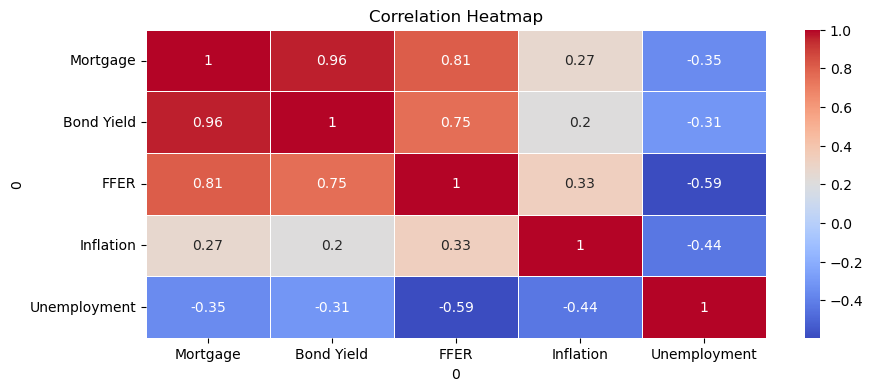

In [5]:
# Compute correlation matrix
correlation_matrix = data[['Mortgage', 'Bond Yield', 'FFER', 'Inflation', 'Unemployment']].corr()

print(correlation_matrix)

# Heatmap for correlation
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

[Text(0.5, 1.0, 'Unemployment Rate Distribution')]

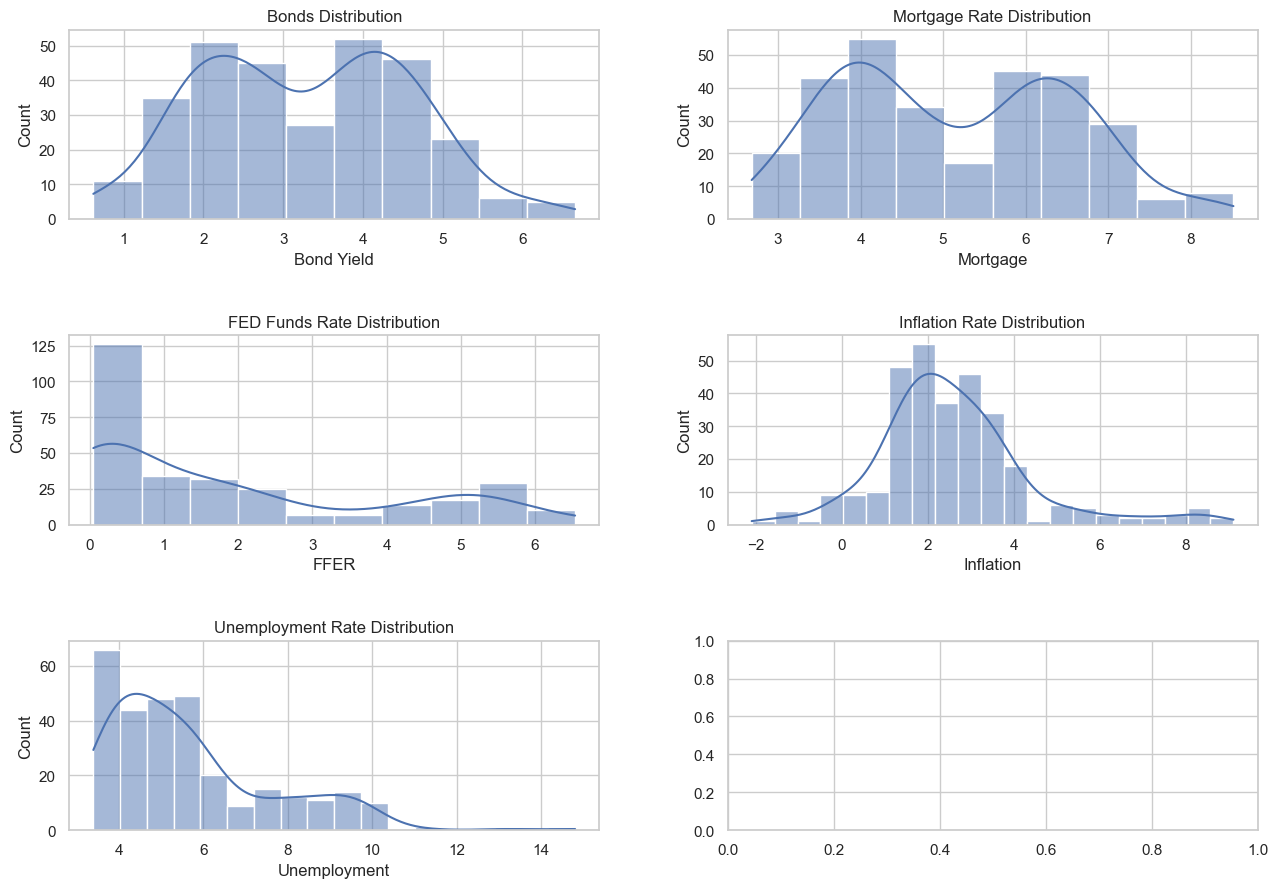

In [6]:
# data distribution plots
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.tight_layout(pad=5.0)

sns.histplot(data['Bond Yield'], kde=True, ax=axes[0, 0]).set(title='Bonds Distribution')
sns.histplot(data['Mortgage'], kde=True, ax=axes[0, 1]).set(title='Mortgage Rate Distribution')
sns.histplot(data['FFER'], kde=True, ax=axes[1, 0]).set(title='FED Funds Rate Distribution')
sns.histplot(data['Inflation'], kde=True, ax=axes[1, 1]).set(title='Inflation Rate Distribution')
sns.histplot(data['Unemployment'], kde=True, ax=axes[2, 0]).set(title='Unemployment Rate Distribution')


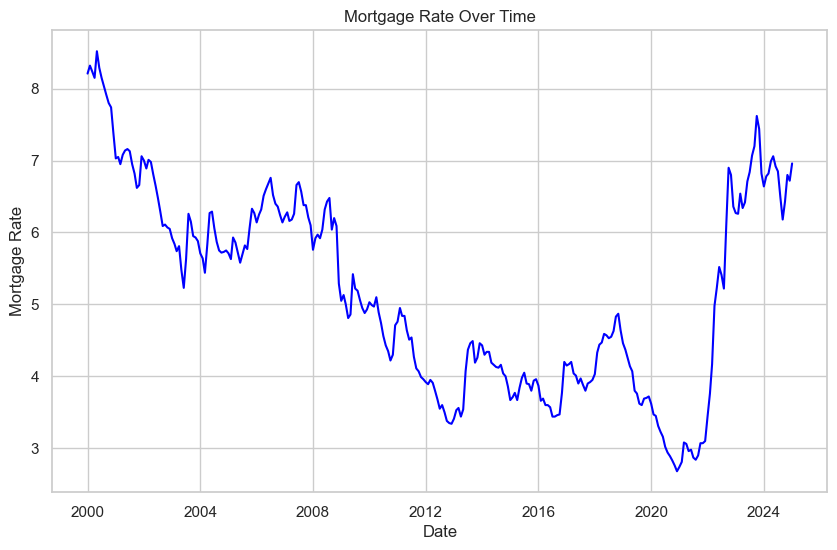

In [7]:
#Line plot of mortgage rate over time
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Mortgage'], label='Mortgage Rates', color='blue')
plt.title('Mortgage Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Mortgage Rate')
plt.grid(True)
plt.show()

Scatter plots of Mortgage Rate vs Economic Factors

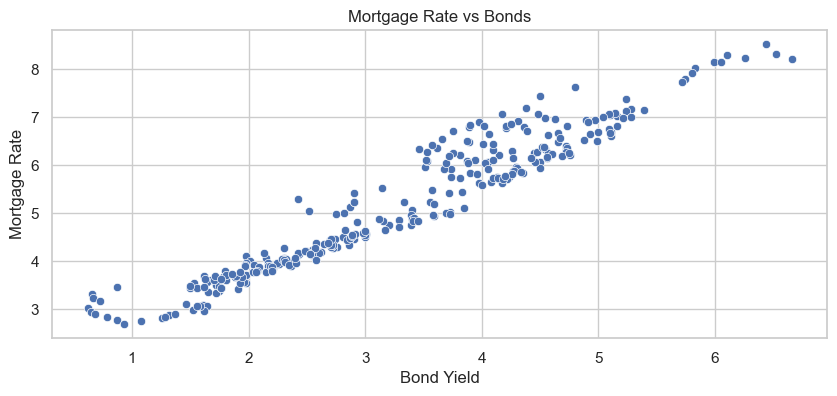

In [9]:
#mortgage rate vs bonds
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['Bond Yield'], y=data['Mortgage'])
plt.title('Mortgage Rate vs Bonds')
plt.xlabel('Bond Yield')
plt.ylabel('Mortgage Rate')
plt.grid(True)
plt.show()

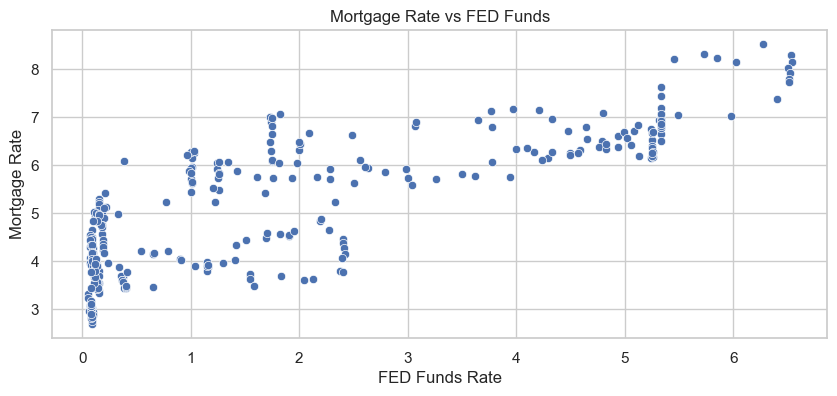

In [10]:
#mortgage rate vs FED Funds
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['FFER'], y=data['Mortgage'])
plt.title('Mortgage Rate vs FED Funds')
plt.xlabel('FED Funds Rate')
plt.ylabel('Mortgage Rate')
plt.grid(True)
plt.show()

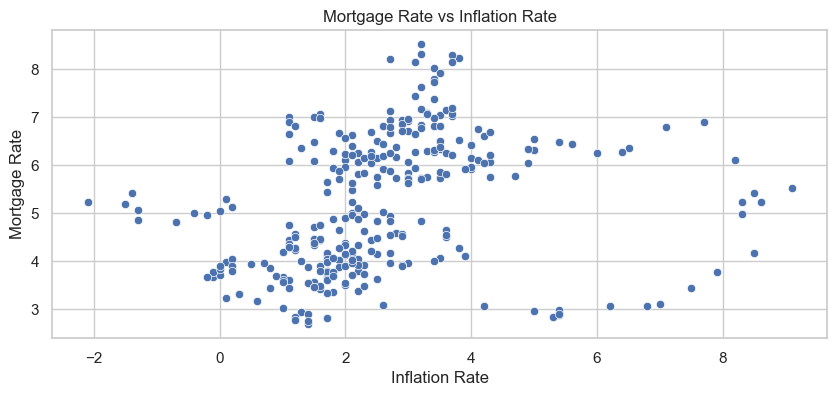

In [11]:
# mortgage rate vs inflation
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['Inflation'], y=data['Mortgage'])
plt.title('Mortgage Rate vs Inflation Rate')
plt.xlabel('Inflation Rate')
plt.ylabel('Mortgage Rate')
plt.grid(True)
plt.show()

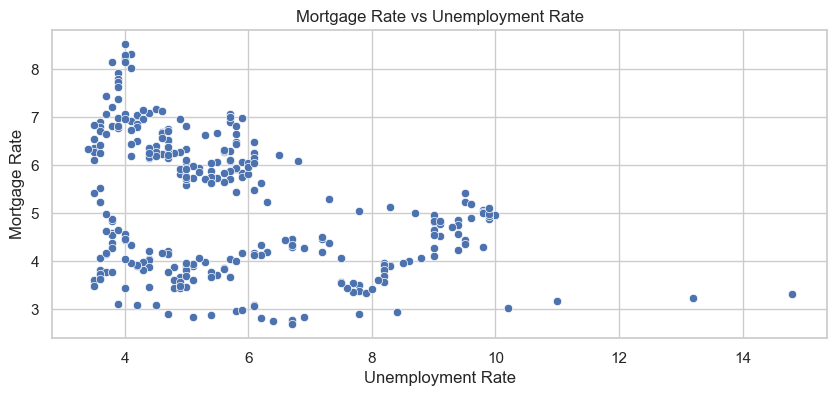

In [12]:
# mortgage rate vs unemployment 
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['Unemployment'], y=data['Mortgage'])
plt.title('Mortgage Rate vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Mortgage Rate')
plt.grid(True)
plt.show()

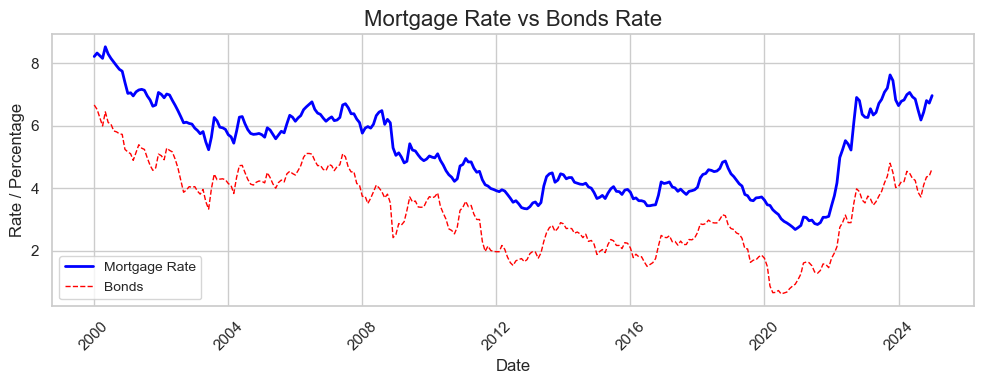

In [13]:
plt.figure(figsize=(10, 4))

plt.plot(data['Date'], data['Mortgage'], label='Mortgage Rate', color='blue', linestyle='-', linewidth=2)

plt.plot(data['Date'], data['Bond Yield'], label='Bonds', color='red', linestyle='--', linewidth=1)

plt.title('Mortgage Rate vs Bonds Rate', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rate / Percentage', fontsize=12)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

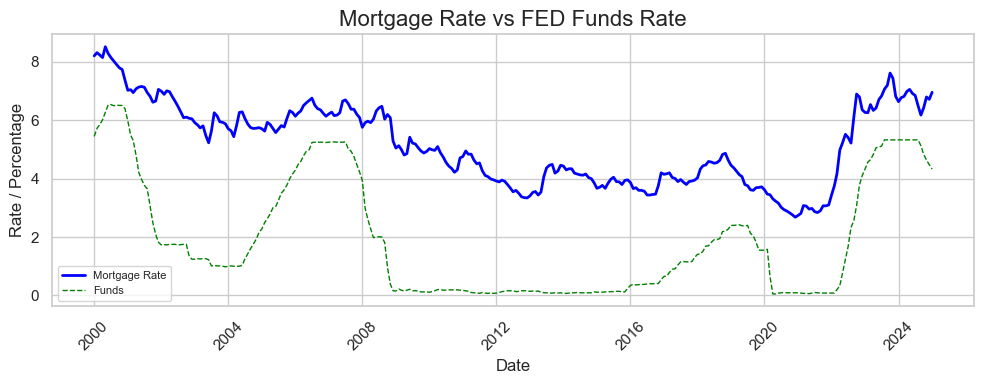

In [14]:
plt.figure(figsize=(10,4))

plt.plot(data['Date'], data['Mortgage'], label='Mortgage Rate', color='blue', linestyle='-', linewidth=2)

plt.plot(data['Date'], data['FFER'], label='Funds', color='green', linestyle='--', linewidth=1)

plt.title('Mortgage Rate vs FED Funds Rate', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rate / Percentage', fontsize=12)
plt.legend(loc='lower left', fontsize=8)
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

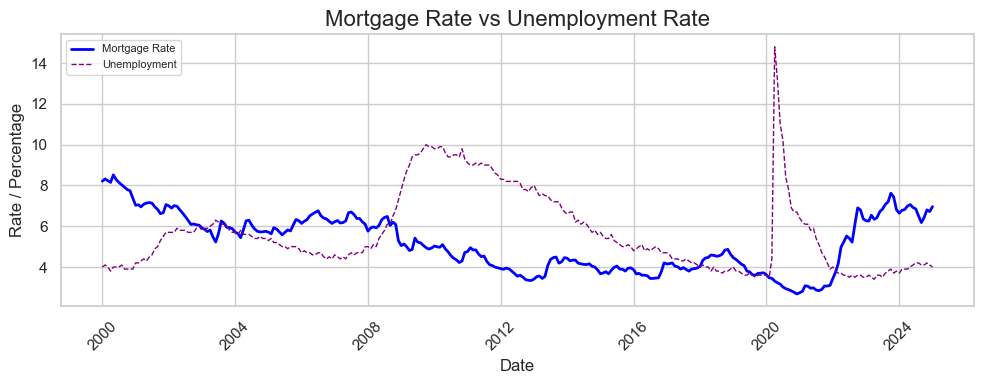

In [15]:
plt.figure(figsize=(10,4))

plt.plot(data['Date'], data['Mortgage'], label='Mortgage Rate', color='blue', linestyle='-', linewidth=2)

plt.plot(data['Date'], data['Unemployment'], label='Unemployment', color='purple', linestyle='--', linewidth=1)

plt.title('Mortgage Rate vs Unemployment Rate', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rate / Percentage', fontsize=12)
plt.legend(loc='upper left', fontsize=8)
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

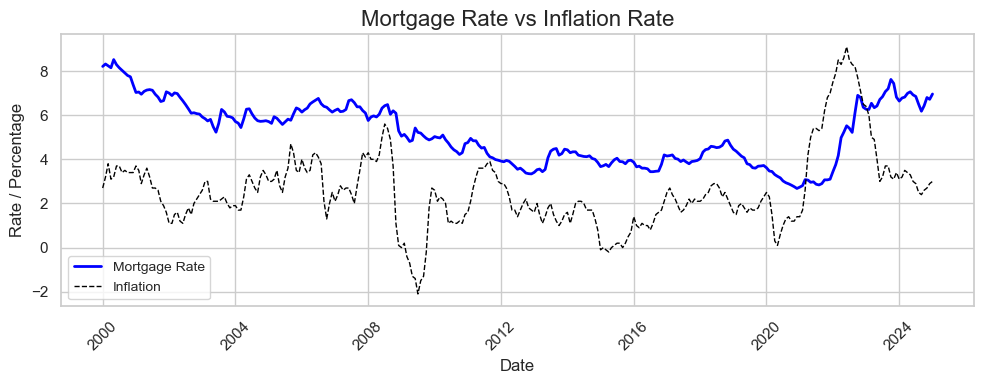

In [16]:
plt.figure(figsize=(10, 4))

plt.plot(data['Date'], data['Mortgage'], label='Mortgage Rate', color='blue', linestyle='-', linewidth=2)

plt.plot(data['Date'], data['Inflation'], label='Inflation', color='black', linestyle='--', linewidth=1)

plt.title('Mortgage Rate vs Inflation Rate', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rate / Percentage', fontsize=12)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()